<a href="https://colab.research.google.com/github/kartoone/cosc470s22/blob/main/nn/Asg3_partial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1**
Using the "book" code to train and evaluate a handwriting digit recognition neural network.

In [1]:
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/nn/book")

import network
import mnist_loader

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)

# part 1 solution
net = network.Network([784,15,10])
net.SGD(training_data, 3, 10, 3.0, test_data=test_data)


Epoch 0 : 8826 / 10000 in 14.69s
Epoch 1 : 8985 / 10000 in 6.45s
Epoch 2 : 9054 / 10000 in 6.74s


**IMPORTANT** Understanding the MNIST dataset as well as the "wrapper" functionality and how it manipulates the MNIST data to fit the author's network.py implementation of a simple neural network.

**First, let's look at the "standard" mnist data layout**

In [2]:
import numpy as np

# first, let's look at the "standard" mnist data layout
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print("STANDARD MNIST DATASET")
print("  training data X",    np.shape(train_X))     # (60000, 28, 28) ... np.shape() returns dimensions sizes, but you can always think of this has a 1D list of 60,000 two dimensional 28x28 images
print("  training data X[0]", np.shape(train_X[0]))  # (28, 28) ... 2D image data
print("  no validata data")
print("  test_data X",    np.shape(test_X))     # (10000, 28, 28) ... 
print("  test_data X[0]", np.shape(test_X[0]))  # (28, 28) ... 2D image data

STANDARD MNIST DATASET
  training data X (60000, 28, 28)
  training data X[0] (28, 28)
  no validata data
  test_data X (10000, 28, 28)
  test_data X[0] (28, 28)


**Now, let's look at the preprocessed "standard" mnist data layout**

In [3]:
# now, let's look at the preprocessed "standard" mnist data layout
#
(tr_X, tr_y), (va_X, va_y), (te_X, te_y) = mnist_loader.load_data()
print("PRE-PROCESSED MNIST DATASET mnist.pkl.gz")
print("  tr_X",    np.shape(tr_X))     # (60000, 784) ... np.shape() returns dimensions sizes, but you can always think of this has a 1D list of 60,000 one dimensional flattend 784 pixel image
print("  tr_X[0]", np.shape(tr_X[0]))  # (784, ) ... 1D pixel image data
print("  va_X",    np.shape(va_X))     # (10000, 784)
print("  va_X[0]", np.shape(va_X[0]))  # (784, ) ... 1D pixel image data
print("  te_X",    np.shape(te_X))     # (10000, 784) ... 
print("  te_X[0]", np.shape(te_X[0]))  # (784, ) ... 1D pixel image data

PRE-PROCESSED MNIST DATASET mnist.pkl.gz
  tr_X (50000, 784)
  tr_X[0] (784,)
  va_X (10000, 784)
  va_X[0] (784,)
  te_X (10000, 784)
  te_X[0] (784,)


**Finally, let's look at the additional post-processing dataset layout**

In [4]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
validation_data = list(validation_data)
test_data = list(test_data)
print(np.shape(training_data))
print(np.shape(validation_data))
print(np.shape(test_data))
print(np.shape(test_data[0][0]))
print(test_data[0][1])
print(np.reshape(test_data[0][0],(28,28)))



(50000, 2)
(10000, 2)
(10000, 2)
(784, 1)
7
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


**EXPLORE** Displaying an example image from the "test" dataset that was correctly classified as well as one that was incorrectly classified

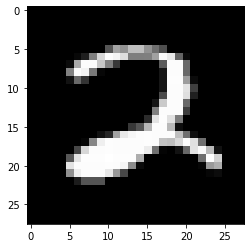

In [5]:
from mnist_viz import plot_image 
test_image = list(np.reshape(test_data[888][0],(28,28)))
plot_image(test_image)